<a href="https://colab.research.google.com/github/LffaZ/elevalteai-PenguinMulticlass/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# kaggle dataset download
!kaggle datasets download -d larsen0966/penguins
!unzip -o penguins.zip

Dataset URL: https://www.kaggle.com/datasets/larsen0966/penguins
License(s): CC0-1.0
penguins.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  penguins.zip
  inflating: penguins.csv            


In [2]:
import pandas as pd
data = pd.read_csv('penguins.csv')
data.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
unique_species = data['species'].unique()
unique_island = data['island'].unique()
unique_sex = data['sex'].unique()

print("Nilai Unik dari species:", unique_species)
print("Nilai Unik dari island:", unique_island)
print("Nilai Unik dari sex:", unique_sex)

Nilai Unik dari species: ['Adelie' 'Gentoo' 'Chinstrap']
Nilai Unik dari island: ['Torgersen' 'Biscoe' 'Dream']
Nilai Unik dari sex: ['male' 'female' nan]


In [29]:
data.describe(include="all")

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,344,344,344.000000,344.000000,344.000000,344.000000,344,344.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,152,168,NaN,NaN,NaN,NaN,179,NaN
mean,172.500000,NaN,NaN,43.925000,17.152035,200.892442,4200.872093,NaN,2008.029070
std,99.448479,NaN,NaN,5.443792,1.969060,14.023826,799.696532,NaN,0.818356
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,86.750000,NaN,NaN,39.275000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,172.500000,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,258.250000,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [30]:
data['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


## Data Cleaning & Transformation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


### Missing Value

In [5]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [6]:
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

# fill num features with median
numeric_features = data[less].select_dtypes(include=['number']).columns
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].median())

# fill category features with mode
kategorical_features = data[less].select_dtypes(include=['object']).columns
for column in kategorical_features:
    data[column] = data[column].fillna(data[column].mode()[0])

In [7]:
df = data.drop(columns=over)
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


### Outliers

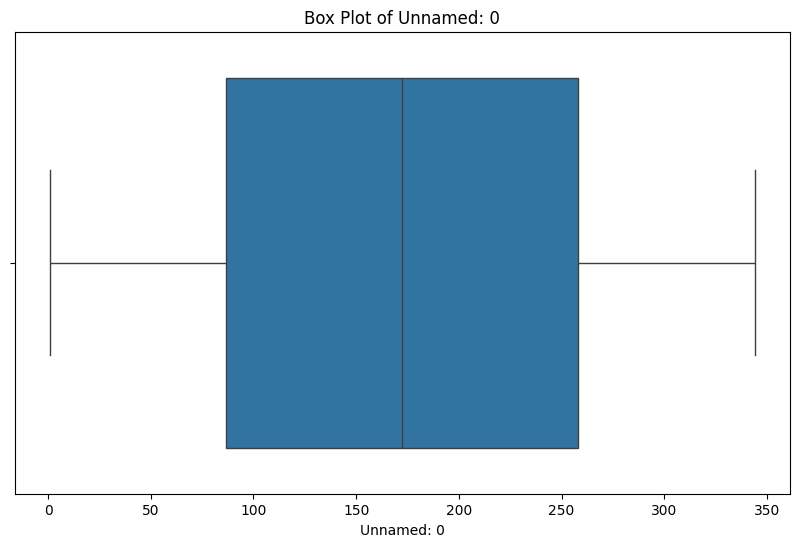

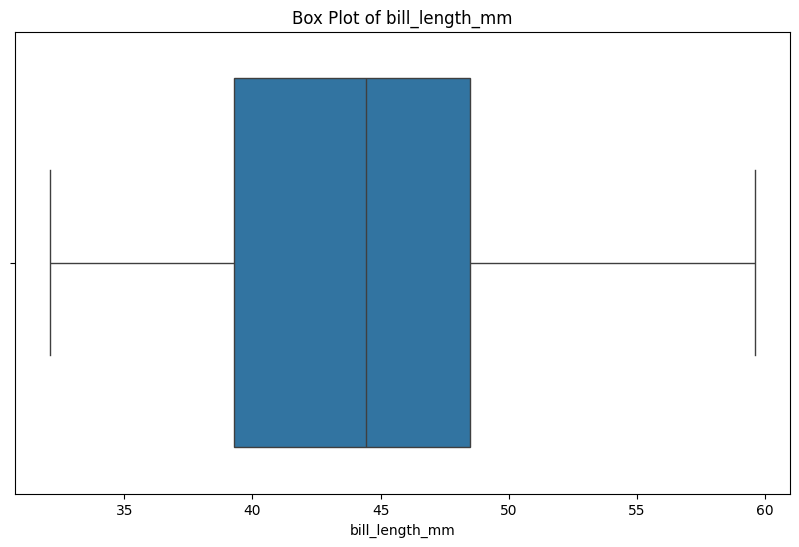

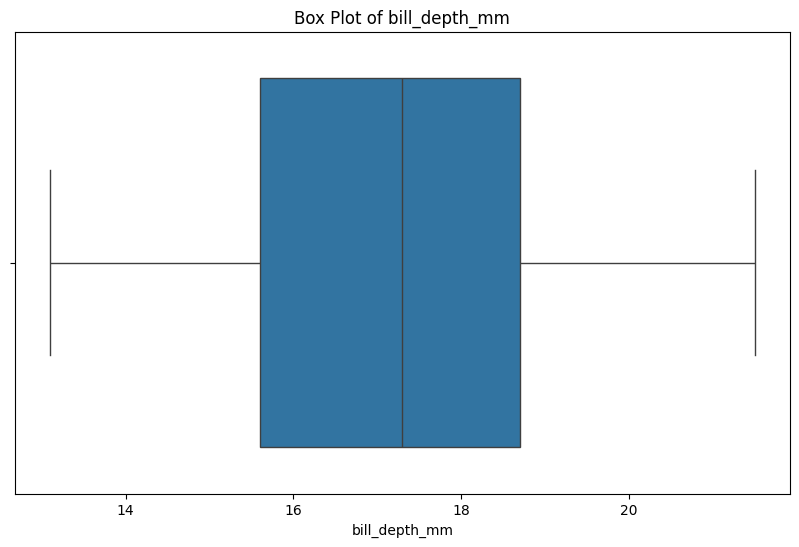

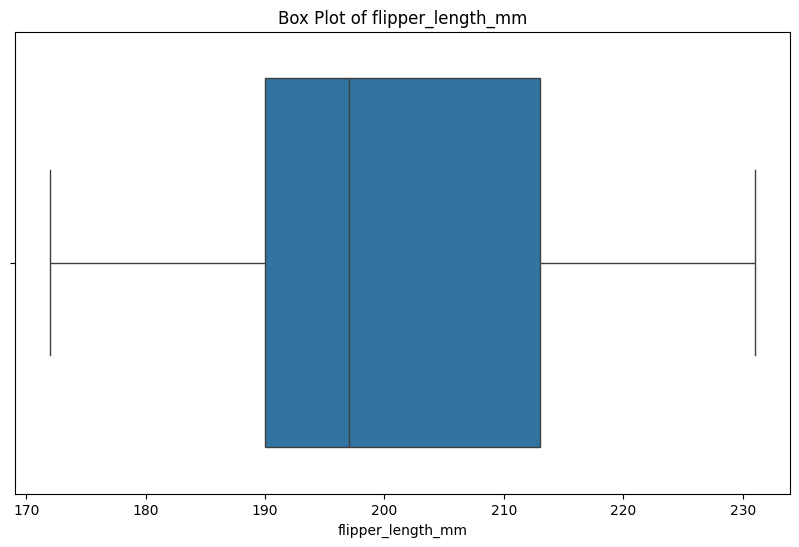

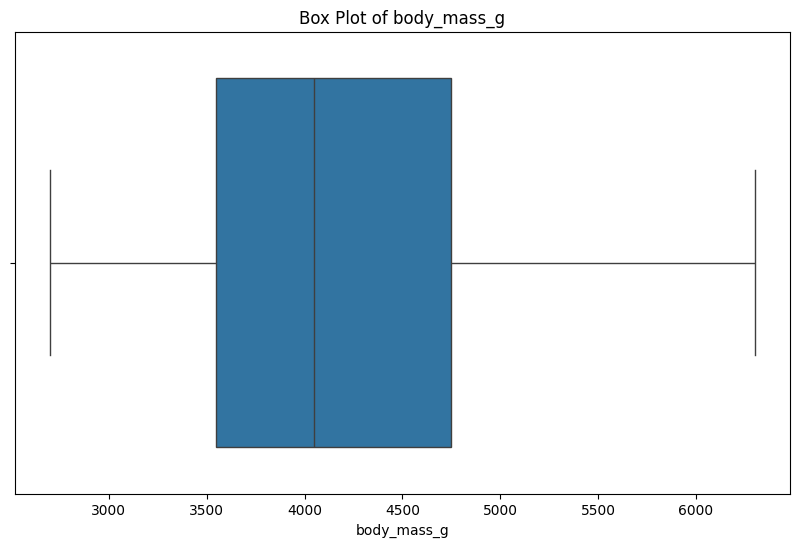

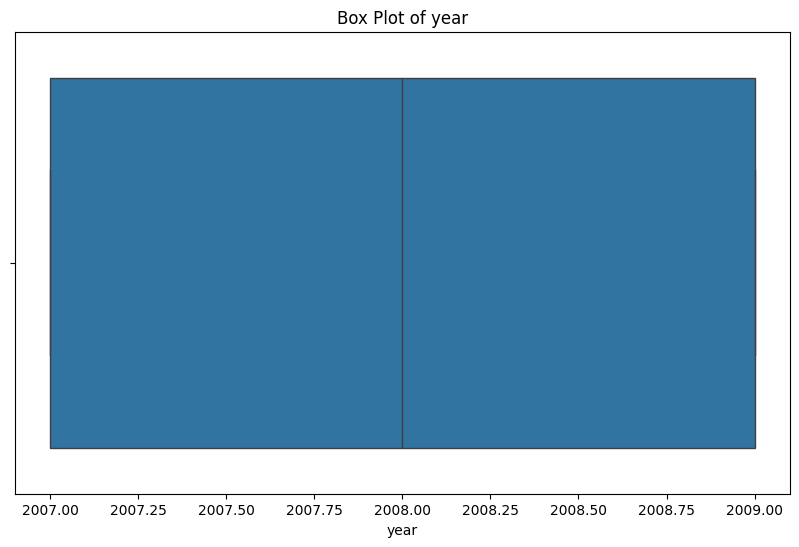

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [10]:
# check outliers with iqr
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

In [11]:
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

### Feature Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

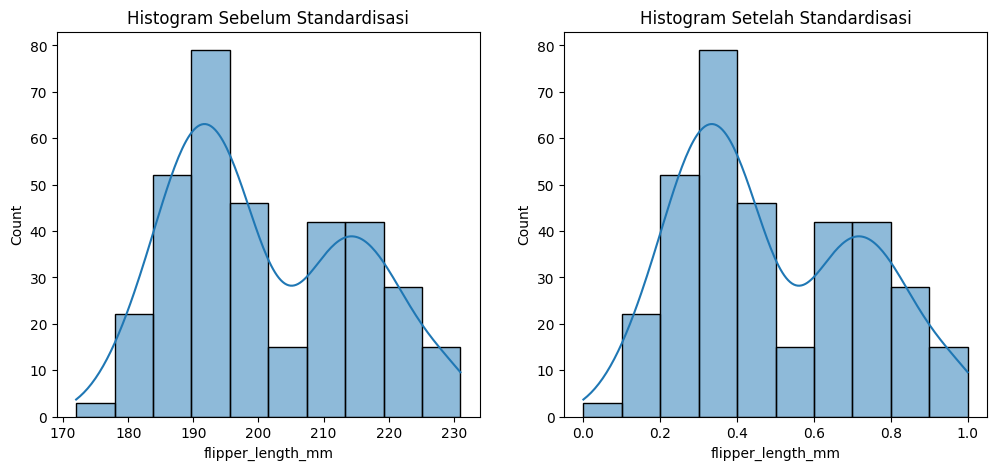

In [13]:
# Before standardization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data[numeric_features[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

# After standardization
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram Setelah Standardisasi")

distribusi data sudah normal

### Duplicate Value

In [14]:
duplicates = df.duplicated()

print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [Unnamed: 0, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, year, species, island, sex]
Index: []


### Encoding

In [15]:
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,species,island,sex
0,Adelie,Torgersen,male
1,Adelie,Torgersen,female
2,Adelie,Torgersen,female
3,Adelie,Torgersen,male
4,Adelie,Torgersen,female
...,...,...,...
339,Chinstrap,Dream,male
340,Chinstrap,Dream,female
341,Chinstrap,Dream,male
342,Chinstrap,Dream,male


In [16]:
df = df.drop(columns=['Unnamed: 0'])

In [17]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])

# Menampilkan hasil
df_lencoder

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species,island,sex
0,0.254545,0.666667,0.152542,0.291667,0.0,0,2,1
1,0.269091,0.511905,0.237288,0.305556,0.0,0,2,0
2,0.298182,0.583333,0.389831,0.152778,0.0,0,2,0
3,0.449091,0.500000,0.423729,0.375000,0.0,0,2,1
4,0.167273,0.738095,0.355932,0.208333,0.0,0,2,0
...,...,...,...,...,...,...,...,...
339,0.861818,0.797619,0.593220,0.361111,1.0,1,1,1
340,0.414545,0.595238,0.508475,0.194444,1.0,1,1,0
341,0.636364,0.607143,0.355932,0.298611,1.0,1,1,1
342,0.680000,0.702381,0.644068,0.388889,1.0,1,1,1


## Exploratory Data Analysis

In [18]:
df_lencoder.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species,island,sex
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.430000,0.482385,0.489702,0.416909,0.514535,0.918605,0.662791,0.520349
std,0.197956,0.234412,0.237692,0.222138,0.409178,0.893320,0.726194,0.500313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260909,0.297619,0.305085,0.236111,0.000000,0.000000,0.000000,0.000000
50%,0.449091,0.500000,0.423729,0.375000,0.500000,1.000000,1.000000,1.000000
75%,0.596364,0.666667,0.694915,0.569444,1.000000,2.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000


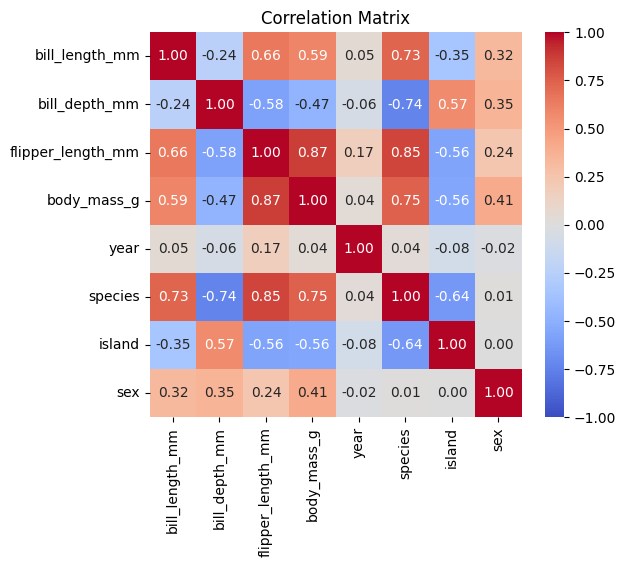

In [33]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(6, 5))
correlation_matrix = df_lencoder.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

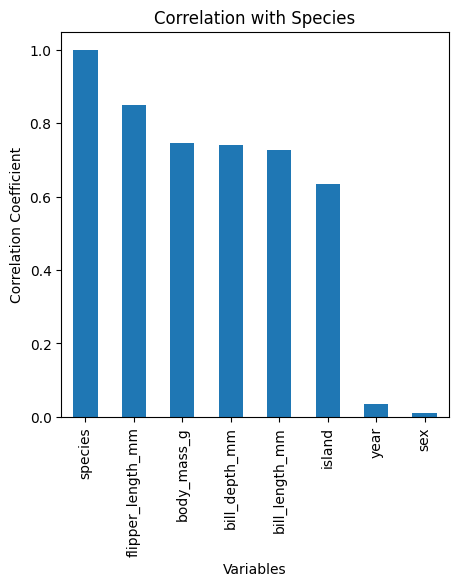

In [20]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df_lencoder.corr()['species']

# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(5, 5))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with Species')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

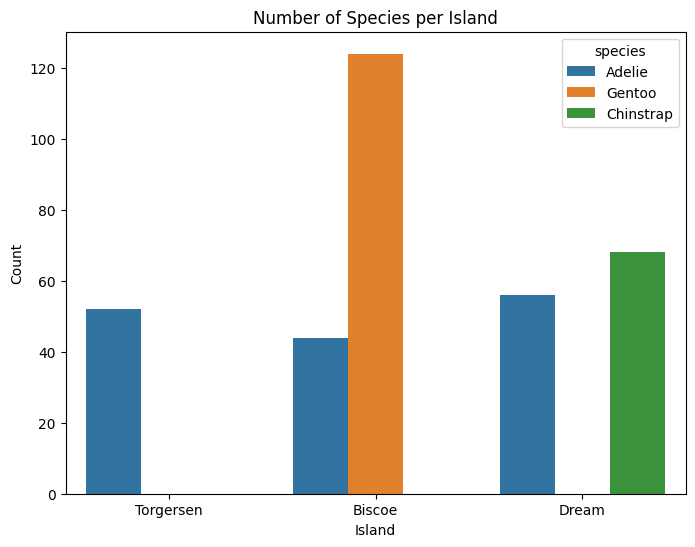

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='island', hue='species')
plt.title('Number of Species per Island')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()

### Data Splitting

In [21]:
import sklearn

X = df_lencoder.drop(columns=['species'])
y = df_lencoder['species']

In [22]:
from sklearn.model_selection import train_test_split

# membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(X_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(X_test))

Jumlah data:  344
Jumlah data latih:  275
Jumlah data test:  69


## Modelling

### One-vs-Rest (OvR) algorithms

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

OvR = OneVsRestClassifier(LogisticRegression())
OvR.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

### Multinomial algorithms

In [25]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

### Both (MNB OVR)

In [26]:
MNB_ovr = OneVsRestClassifier(MultinomialNB())
MNB_ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=MultinomialNB())

### Evaluate

In [27]:
pred_mnb = MNB.predict(X_test)
pred_ovr = OvR.predict(X_test)

pred_mnb_ovr = MNB_ovr.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
print("\033[1;34mOne vs Rest Evaluation Logistic Regression Evaluation\033[0m")
print(classification_report(y_test, pred_ovr))

print("\033[1;34mMultinomial Naive Bayes Evaluation\033[0m")
print(classification_report(y_test, pred_mnb))

print("\033[1;34mOne-vs-Rest Multinomial Naive Bayes Evaluation\033[0m")
print(classification_report(y_test, pred_mnb_ovr))

One vs Rest Evaluation Logistic Regression Evaluation
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        20

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69

Multinomial Naive Bayes Evaluation
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        34
           1       0.00      0.00      0.00        15
           2       0.71      1.00      0.83        20

    accuracy                           0.67        69
   macro avg       0.45      0.59      0.51        69
weighted avg       0.52      0.67      0.58        69

One-vs-Rest Multinomial Naive Bayes Evaluation
              precision    recall  f1-score   support

           0       0.62      0.74      0.68    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m